In [1]:
#pip install apyori

In [2]:
#ipip install mlxtend

In [3]:
import pandas as pd
df = pd.read_excel("Online retail.xlsx", header=None)
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [4]:
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


### Data Preprocessing:

In [6]:
df.isnull().sum()

0    0
dtype: int64

In [7]:
len(df[df.duplicated()])

2325

In [8]:
df[df.duplicated()]

,0
34,cookies
42,spaghetti
60,spaghetti
64,"turkey,eggs"
65,french fries
...,...
7491,herb & pepper
7492,"chocolate,escalope"
7495,"pancakes,light mayo"
7498,chicken


In [10]:
df = df.drop_duplicates()
df.shape

(5176, 1)

In [11]:
df = df[0].str.split(",", expand=True)

In [12]:
df.to_excel("expanded_transactions.xlsx", index=False)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [14]:
items = []

In [15]:
for i in range(0,5176):
     items.append([str(df.values[i,j]) for j in range(0,20)])
print(items)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'], ['chutney', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'], ['turkey', 'avocado', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'], ['low fat yogurt'

### Association Rule Mining:

In [16]:
from apyori import apriori

In [17]:
apriori

<function apyori.apriori(transactions, **kwargs)>

In [18]:
rules = apriori(transactions = items,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2,max_length=2)

In [19]:
results = list(rules)
len(results)

6

In [20]:
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.006568778979907265, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2931034482758621, lift=3.4956300651517562)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.006955177743431221, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.288, lift=3.434764976958525)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005023183925811438, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.2888888888888889, lift=3.44536610343062)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.004829984544049459, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0.247524752475

### Analysis and Interpretation:

In [21]:
results[0]

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.006568778979907265, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2931034482758621, lift=3.4956300651517562)])

In [22]:
results[3]

RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.004829984544049459, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0.24752475247524752, lift=3.7904973929345593)])

In [23]:
print(results[0][1])  #support
print(results[0][2][0][0])  #base item
print(results[0][2][0][1])  #add item
print(results[0][2][0][2])  #confidence
print(results[0][2][0][3])  #lift

0.006568778979907265
frozenset({'light cream'})
frozenset({'chicken'})
0.2931034482758621
3.4956300651517562


In [24]:
a = []
b = []
c = []
d = []
e = []

In [25]:
for i in range(0,6):
    a.append(results[i][1]) # support
    b.append(results[i][2][0][0]) # base item
    c.append(results[i][2][0][1]) # add item
    d.append(results[i][2][0][2]) # confidence
    e.append(results[i][2][0][3]) # lift

In [26]:
print(a)
print(b)
print(c)
print(d)
print(e)

[0.006568778979907265, 0.006955177743431221, 0.005023183925811438, 0.004829984544049459, 0.011012364760432767, 0.0071483771251932]
[frozenset({'light cream'}), frozenset({'mushroom cream sauce'}), frozenset({'pasta'}), frozenset({'fromage blanc'}), frozenset({'whole wheat pasta'}), frozenset({'pasta'})]
[frozenset({'chicken'}), frozenset({'escalope'}), frozenset({'escalope'}), frozenset({'honey'}), frozenset({'olive oil'}), frozenset({'shrimp'})]
[0.2931034482758621, 0.288, 0.2888888888888889, 0.24752475247524752, 0.27142857142857146, 0.41111111111111115]
[3.4956300651517562, 3.434764976958525, 3.44536610343062, 3.7904973929345593, 3.0945248584015106, 4.15607638888889]


In [27]:
a = pd.DataFrame(a)    
b = pd.DataFrame(b)
c = pd.DataFrame(c)
d = pd.DataFrame(d)
e = pd.DataFrame(e)

In [28]:
df_asso_rules = pd.concat([a,b,c,d,e],axis=1)
df_asso_rules

,0,0,0,0,0
0,0.006569,light cream,chicken,0.293103,3.495630
1,0.006955,mushroom cream sauce,escalope,0.288000,3.434765
2,0.005023,pasta,escalope,0.288889,3.445366
3,0.004830,fromage blanc,honey,0.247525,3.790497
4,0.011012,whole wheat pasta,olive oil,0.271429,3.094525
5,0.007148,pasta,shrimp,0.411111,4.156076


In [29]:
df_asso_rules.columns = ["Support",'Base',"Add","confidence",'Lift']
df_asso_rules

,Support,Base,Add,confidence,Lift
0,0.006569,light cream,chicken,0.293103,3.495630
1,0.006955,mushroom cream sauce,escalope,0.288000,3.434765
2,0.005023,pasta,escalope,0.288889,3.445366
3,0.004830,fromage blanc,honey,0.247525,3.790497
4,0.011012,whole wheat pasta,olive oil,0.271429,3.094525
5,0.007148,pasta,shrimp,0.411111,4.156076


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
heatmap_data = df_asso_rules.pivot(index='Base', columns='Add', values='Lift')
heatmap_data

Add,chicken,escalope,honey,olive oil,shrimp
Base,,,,,
fromage blanc,NaN,NaN,3.790497,NaN,NaN
light cream,3.49563,NaN,NaN,NaN,NaN
mushroom cream sauce,NaN,3.434765,NaN,NaN,NaN
pasta,NaN,3.445366,NaN,NaN,4.156076
whole wheat pasta,NaN,NaN,NaN,3.094525,NaN


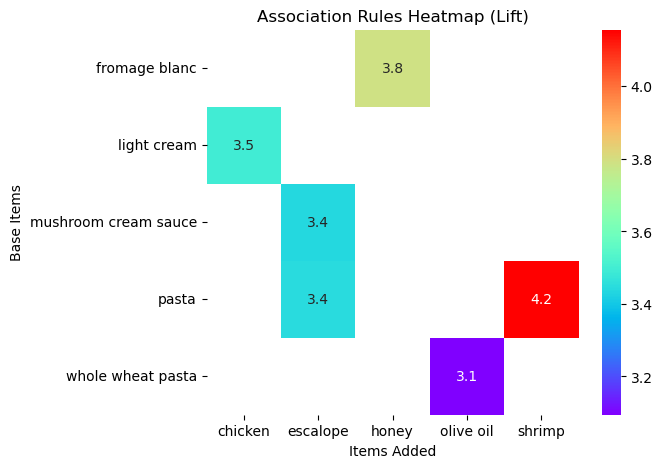

In [32]:
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, cmap='rainbow')
plt.title('Association Rules Heatmap (Lift)')
plt.xlabel('Items Added')
plt.ylabel('Base Items')
plt.show()

In [33]:
heatmap_data = df_asso_rules.pivot(index='Base', columns='Add', values='Support')
heatmap_data

Add,chicken,escalope,honey,olive oil,shrimp
Base,,,,,
fromage blanc,NaN,NaN,0.00483,NaN,NaN
light cream,0.006569,NaN,NaN,NaN,NaN
mushroom cream sauce,NaN,0.006955,NaN,NaN,NaN
pasta,NaN,0.005023,NaN,NaN,0.007148
whole wheat pasta,NaN,NaN,NaN,0.011012,NaN


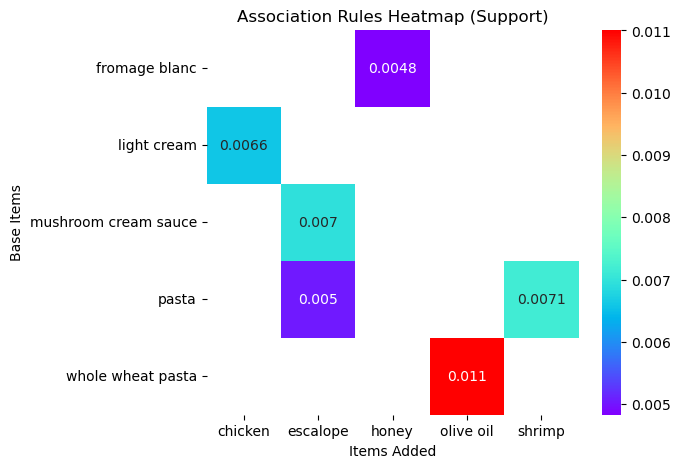

In [34]:
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, cmap='rainbow')
plt.title('Association Rules Heatmap (Support)')
plt.xlabel('Items Added')
plt.ylabel('Base Items')
plt.show()

In [35]:
heatmap_data = df_asso_rules.pivot(index='Base', columns='Add', values='confidence')
heatmap_data

Add,chicken,escalope,honey,olive oil,shrimp
Base,,,,,
fromage blanc,NaN,NaN,0.247525,NaN,NaN
light cream,0.293103,NaN,NaN,NaN,NaN
mushroom cream sauce,NaN,0.288000,NaN,NaN,NaN
pasta,NaN,0.288889,NaN,NaN,0.411111
whole wheat pasta,NaN,NaN,NaN,0.271429,NaN


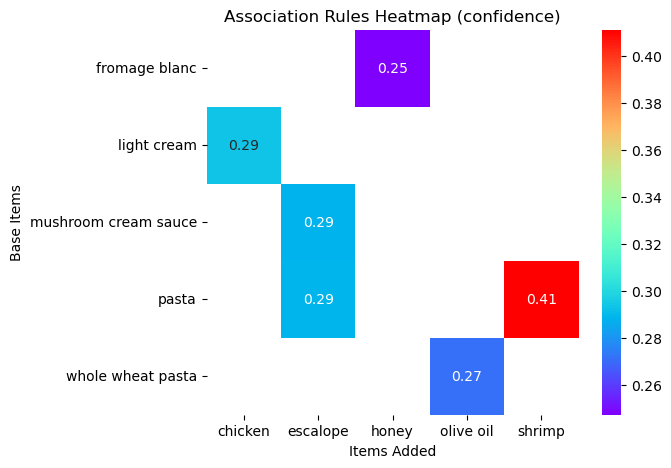

In [36]:
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, cmap='rainbow')
plt.title('Association Rules Heatmap (confidence)')
plt.xlabel('Items Added')
plt.ylabel('Base Items')
plt.show()

In [37]:
rules = apriori(transactions = items,min_support=0.005,min_confidence=0.35,min_lift=3,min_length=2,max_length=2)

In [38]:
results = list(rules)
len(results)

1

In [39]:
results[0]

RelationRecord(items=frozenset({'shrimp', 'pasta'}), support=0.0071483771251932, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'shrimp'}), confidence=0.41111111111111115, lift=4.15607638888889)])

In [40]:
rules = apriori(transactions = items,min_support=0.007,min_confidence=0.2,min_lift=3,min_length=2,max_length=2)

In [41]:
results = list(rules)
len(results)

2

In [42]:
results[0]

RelationRecord(items=frozenset({'olive oil', 'whole wheat pasta'}), support=0.011012364760432767, ordered_statistics=[OrderedStatistic(items_base=frozenset({'whole wheat pasta'}), items_add=frozenset({'olive oil'}), confidence=0.27142857142857146, lift=3.0945248584015106)])

In [43]:
a = []
b = []
c = []
d = []
e = []

In [44]:
for i in range(0,2):
    a.append(results[i][1]) # support
    b.append(results[i][2][0][0]) # base item
    c.append(results[i][2][0][1]) # add item
    d.append(results[i][2][0][2]) # confidence
    e.append(results[i][2][0][3]) # lift

In [45]:
a = pd.DataFrame(a)    
b = pd.DataFrame(b)
c = pd.DataFrame(c)
d = pd.DataFrame(d)
e = pd.DataFrame(e)

In [46]:
df_asso_rules = pd.concat([a,b,c,d,e],axis=1)
df_asso_rules.columns = ["Support",'Base',"Add","confidence",'Lift']
df_asso_rules

,Support,Base,Add,confidence,Lift
0,0.011012,whole wheat pasta,olive oil,0.271429,3.094525
1,0.007148,pasta,shrimp,0.411111,4.156076


### Interview Questions:

1. What is Lift and why is it important in Association Rules?
   
Definition:
Lift measures how much more likely two items (X and Y) occur together than if they were independent.Lift is a metric that is used to identify an item boosting the purchase of another item.

importance:
Lift helps filter out rules that look strong (high support & confidence) but are actually trivial because the items are just common individually. It highlights true associations that are not due to chance. 
For example, purchase of bread leads to purchase of jam or peanut butter. It important in Association rules as it helps to discover useful patterns and descion making


 2.What is support and Confidence. How do you calculate them?

Support:
Measures how frequently an itemset appears in the dataset.
Support tells you how popular the rule is overall.

Confidence:
Measures how often item Y appears in transactions that already contain X.
Confidence tells you how reliable the rule is.

Support is nothing but the probabilty of purchacing an item or frequency of purchasing an item . 
It is caliculated by number of transactions of a particular item or items divided by total number of transactions.

3.What are some limitations or challenges of Association Rule Mining?

1.Too many rules: It can generate thousands of rules, making it hard to interpret.
2.Trivial rules: Some rules may have high support & confidence but are obvious (e.g., {milk}→{grocery bag}).
3.Rare item problem: Rare but important associations may be missed if support threshold is too high.
4.Scalability: Mining rules from very large datasets can be computationally expensive.
5.No causation: Association rules only show correlation, not causality (e.g., {umbrella}→{rain} is correlation, not cause).
6.Domain knowledge needed: Analysts must interpret which rules are meaningful and actionable.